In [1]:
import sys

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

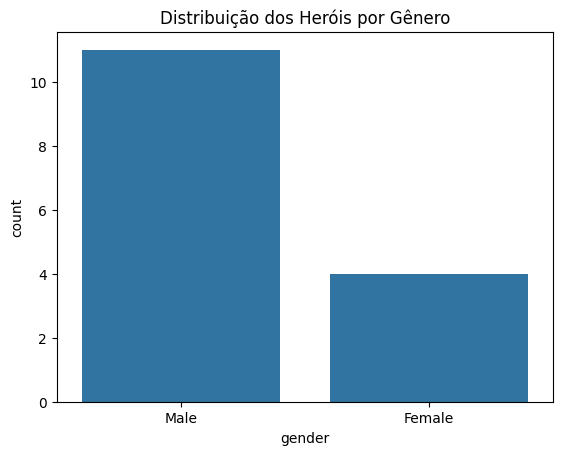

In [5]:
df_heroes = pd.read_parquet("../data/analytics/analytics_dim_heroes.parquet")
sns.countplot(data=df_heroes, x='gender')
plt.title("Distribuição dos Heróis por Gênero")
plt.show()

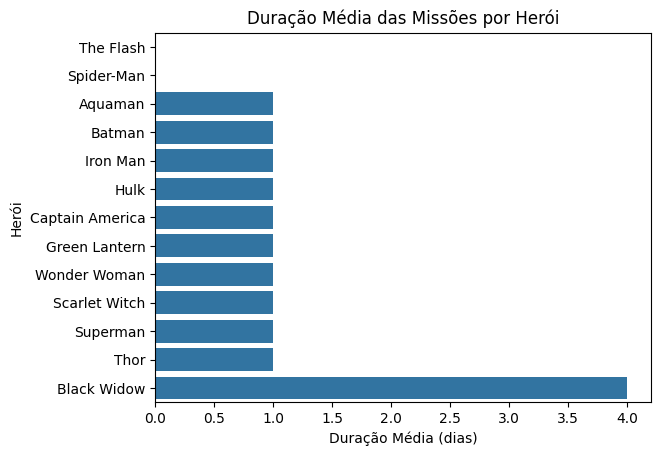

In [45]:
df_missions = pd.read_parquet("../data/analytics/analytics_fact_missions.parquet")
data = df_missions[df_missions['is_ongoing'] == False].merge(df_heroes[['hero_id', 'name']], on = 'hero_id', how = 'left')
missions_duration = data.groupby('name')['duration'].mean().reset_index()
missions_duration = missions_duration.sort_values('duration', ascending=True)

sns.barplot(data=missions_duration, x='duration', y='name')
plt.title("Duração Média das Missões por Herói")
plt.xlabel("Duração Média (dias)")
plt.ylabel("Herói")
plt.show()

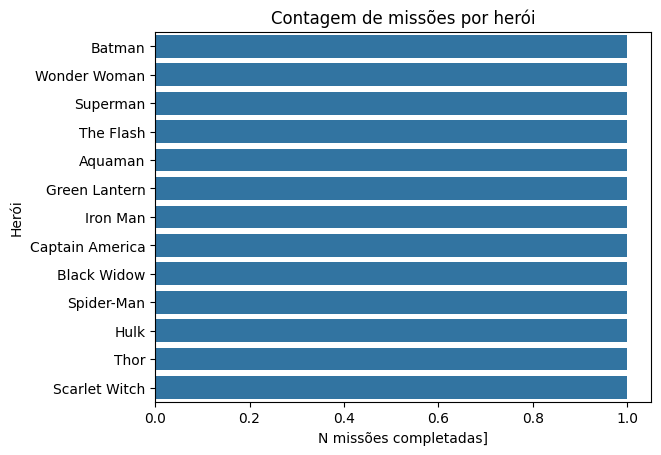

In [49]:
mission_count = data['name'].value_counts().reset_index()
sns.barplot(data=mission_count, y='name', x='count')
plt.title("Contagem de missões por herói")
plt.xlabel("N missões completadas]")
plt.ylabel("Herói")
plt.show()